In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as datetime

### This visual plots the max recorded temperature for each day in 2024 for Anchorage, AK and Miami, FL
### Data gathered from NOAA weather stations at main airport for each location

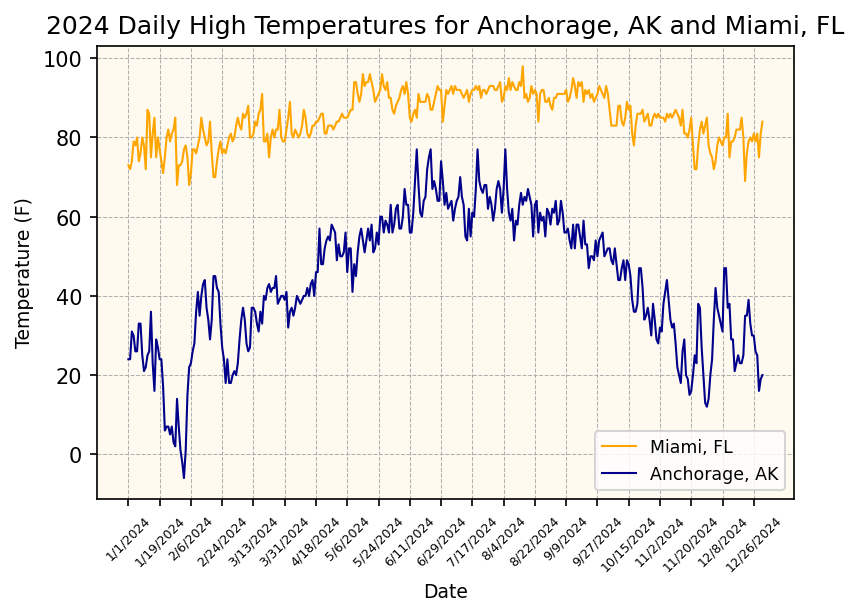

In [6]:
#import datasets
ak_full = pd.read_csv("anchorage_ak_noaa_2024.csv")
fl_full = pd.read_csv("miami_fl_noaa_2024.csv")
#rename columns so that they are unique and can be merged as separate columns
ak_full.rename(columns={'TMAX':'TMAX_AK'},inplace=True)
fl_full.rename(columns={'TMAX':'TMAX_FL'},inplace=True)
#filter for airport station data only
fl_full_airport = fl_full[fl_full.STATION == 'USW00012839']
ak_full_airport = ak_full[ak_full.STATION == 'USW00026451']
#trim dataframes with only info that needs to be plotted
fl_full_airport_focused = fl_full_airport[['DATE','TMAX_FL']]
ak_full_airport_focused = ak_full_airport[['DATE','TMAX_AK']]

#merge dataframes
ak_fl = fl_full_airport_focused.merge(ak_full_airport_focused,how='left',on='DATE')

#plot temperature data
plt.rcParams['figure.dpi'] = 150
plt.plot(ak_fl['DATE'],ak_fl['TMAX_FL'],c="orange",label='Miami, FL',lw=1)
plt.plot(ak_fl['DATE'],ak_fl['TMAX_AK'],c="darkblue",label='Anchorage, AK',lw=1)
plt.xticks(np.arange(0,367,18),rotation=45, fontsize=6)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Temperature (F)', fontsize=9)
plt.grid(axis='y', ls='--', lw=.5)
plt.grid(axis='x', ls='--', lw=.5)
plt.gca().set_facecolor('floralwhite')
plt.title('2024 Daily High Temperatures for Anchorage, AK and Miami, FL')
plt.legend(fontsize='small')
plt.show()

### This visual shows the monthly average high temperatures for 4 different cities in the US

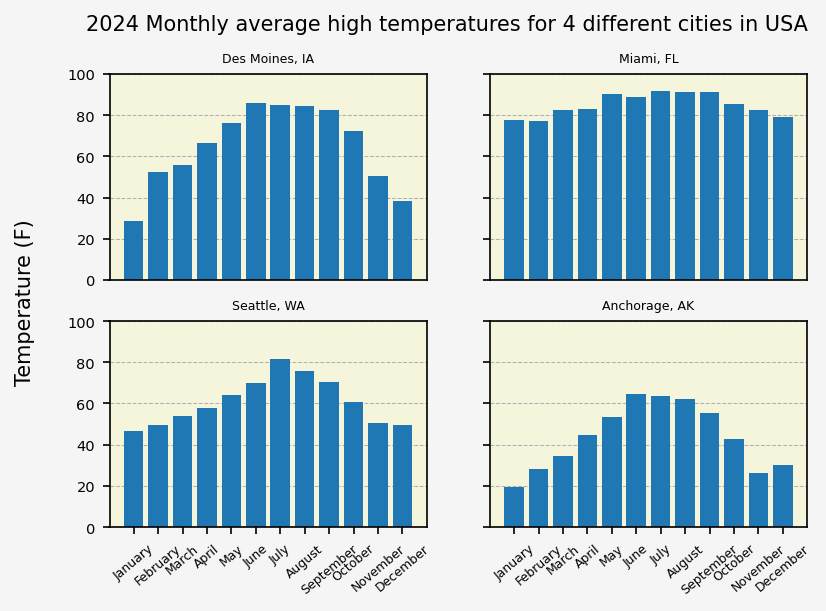

In [8]:
#import locations
ia_full = pd.read_csv("dsm_ia_noaa_2024.csv")
wa_full = pd.read_csv("seattle_wa_noaa_2024.csv")

#rename needed columns for each set to make the unique to make merging easier
ia_full.rename(columns={'TMAX':'TMAX_IA'},inplace=True)
wa_full.rename(columns={'TMAX':'TMAX_WA'},inplace=True)

#filter for airport station data only
ia_full_airport = ia_full[ia_full.STATION == 'USW00014933']
wa_full_airport = wa_full[wa_full.STATION == 'USW00024233']
#create trimmed dataframes with only date, temp, and precipitation info
ia_full_airport_focused = ia_full_airport[['DATE','TMAX_IA']]
wa_full_airport_focused = wa_full_airport[['DATE','TMAX_WA']]

#merge dataframes
ak_fl_ia = ak_fl.merge(ia_full_airport_focused,how='left',on='DATE')
all_states_info = ak_fl_ia.merge(wa_full_airport_focused,how='left',on='DATE')
#create 4 plot figure with bar charts showing monthly average temperatures for each location

#group by month
all_states_info.insert(1,'MONTH',all_states_info.DATE.apply(lambda x: pd.to_datetime(str(x)).strftime('%B')))
all_states_info.drop(columns=['DATE'],inplace=True)
#get monthly temp averages for each location
monthly_avg_temps = round(all_states_info.groupby('MONTH').mean(),2).reset_index()

#sort dataframe by months sequentially
sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avg_temps.index = pd.CategoricalIndex(monthly_avg_temps['MONTH'],categories=sort_order,ordered=True)
monthly_avg_temps_sorted = monthly_avg_temps.sort_index()

#remove extra index
monthly_avg_temps_sorted = monthly_avg_temps_sorted.reset_index(drop=True)

#rename dataframe
avg_monthly_temps = monthly_avg_temps_sorted

#create 4 plot figure with bar charts showing monthly average temperatures for each location
fig,axs = plt.subplots(2,2,gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]},sharey='all')
fig.set_facecolor('whitesmoke')
axs[0,0].bar(avg_monthly_temps.MONTH,avg_monthly_temps.TMAX_IA)
axs[0,0].title.set_text("Des Moines, IA")
axs[0,0].title.set_fontsize(6)
axs[0,0].xaxis.set_visible(False)
axs[0,0].set_yticks([0,20,40,60,80,100])
axs[0,0].tick_params(axis='y',labelsize=7)
axs[0,0].set_ylim(0,100)
axs[0,0].set_facecolor('beige')
axs[0,0].grid(ls='--',lw=.5)
axs[0,0].set_axisbelow(True)
axs[0,1].bar(avg_monthly_temps.MONTH,avg_monthly_temps.TMAX_FL)
axs[0,1].title.set_text("Miami, FL")
axs[0,1].title.set_fontsize(6)
axs[0,1].xaxis.set_visible(False)
axs[0,1].set_facecolor('beige')
axs[0,1].grid(ls='--',lw=.5)
axs[0,1].set_axisbelow(True)
axs[1,0].bar(avg_monthly_temps.MONTH,avg_monthly_temps.TMAX_WA)
axs[1,0].title.set_text("Seattle, WA")
axs[1,0].title.set_fontsize(6)
axs[1,0].tick_params(axis='y',labelsize=7)
axs[1,0].tick_params(axis='x',labelsize=6,labelrotation=40)
axs[1,0].set_facecolor('beige')
axs[1,0].grid(ls='--',lw=.5,axis='y')
axs[1,0].set_axisbelow(True)
axs[1,1].bar(avg_monthly_temps.MONTH,avg_monthly_temps.TMAX_AK)
axs[1,1].title.set_text("Anchorage, AK")
axs[1,1].title.set_fontsize(6)
axs[1,1].tick_params(axis='x',labelsize=6,labelrotation=40)
axs[1,1].set_facecolor('beige')
axs[1,1].grid(ls='--',lw=.5,axis='y')
axs[1,1].set_axisbelow(True)
fig.suptitle("2024 Monthly average high temperatures for 4 different cities in USA",fontsize=10)
fig.supylabel('Temperature (F)', fontsize=10)
plt.show()

### This visual shows the percent of days in 2024 temperature was recorded within defined ranges for 4 cities

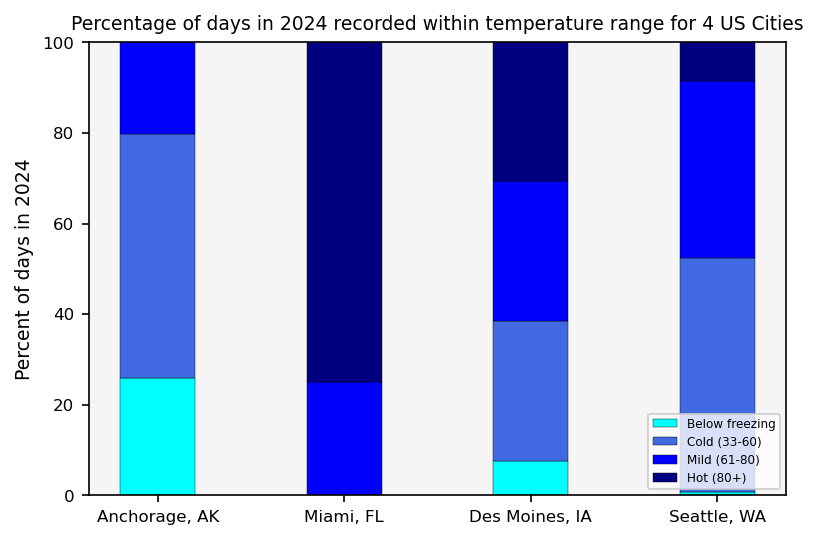

In [10]:

ia_full = pd.read_csv("dsm_ia_noaa_2024.csv")
fl_full = pd.read_csv("miami_fl_noaa_2024.csv")
wa_full = pd.read_csv("seattle_wa_noaa_2024.csv")
ak_full = pd.read_csv("anchorage_ak_noaa_2024.csv")
ia_full_airport = ia_full[ia_full.STATION == 'USW00014933']
wa_full_airport = wa_full[wa_full.STATION == 'USW00024233']
fl_full_airport = fl_full[fl_full.STATION == 'USW00012839']
ak_full_airport = ak_full[ak_full.STATION == 'USW00026451']
ia_full_airport_focused = ia_full_airport[['DATE','TMAX']]
wa_full_airport_focused = wa_full_airport[['DATE','TMAX']]
fl_full_airport_focused = fl_full_airport[['DATE','TMAX']]
ak_full_airport_focused = ak_full_airport[['DATE','TMAX']]
ia_full_airport_focused.insert(1,'STATE','IA')
wa_full_airport_focused.insert(1,'STATE','WA')
fl_full_airport_focused.insert(1,'STATE','FL')
ak_full_airport_focused.insert(1,'STATE','AK')
all_states_temps = pd.concat([ia_full_airport_focused,wa_full_airport_focused,fl_full_airport_focused,ak_full_airport_focused],ignore_index=True)

all_states_temps['TEMP_RANGE'] = pd.cut(all_states_temps['TMAX'],[-10,32,60,80,100],labels=['freezing','cold','mild','hot'])
all_states_temps_groups = all_states_temps.groupby(['STATE','TEMP_RANGE'],observed=False).size().reset_index()

all_states_temps_groups.columns = ['STATE','TEMP_RANGE','TOTAL_DAYS_IN_RANGE']
fig1 = all_states_temps_groups[all_states_temps_groups['TEMP_RANGE']=='freezing']
fig2 = all_states_temps_groups[all_states_temps_groups['TEMP_RANGE']=='cold']
fig3 = all_states_temps_groups[all_states_temps_groups['TEMP_RANGE']=='mild']
fig4 = all_states_temps_groups[all_states_temps_groups['TEMP_RANGE']=='hot']
fig1.columns = ['STATE','TEMP_RANGE','TOTAL_DAYS_IN_RANGE']
fig2.columns = ['STATE','TEMP_RANGE','TOTAL_DAYS_IN_RANGE']
fig3.columns = ['STATE','TEMP_RANGE','TOTAL_DAYS_IN_RANGE']
fig4.columns = ['STATE','TEMP_RANGE','TOTAL_DAYS_IN_RANGE']

total_height = [sum(x) for x in zip(fig1['TOTAL_DAYS_IN_RANGE'].tolist(),fig2['TOTAL_DAYS_IN_RANGE'].tolist(),fig3['TOTAL_DAYS_IN_RANGE'].tolist(),fig4['TOTAL_DAYS_IN_RANGE'].tolist())]

fig1 = (fig1['TOTAL_DAYS_IN_RANGE']/total_height)*100
fig2 = (fig2['TOTAL_DAYS_IN_RANGE']/total_height)*100
fig3 = (fig3['TOTAL_DAYS_IN_RANGE']/total_height)*100
fig4 = (fig4['TOTAL_DAYS_IN_RANGE']/total_height)*100

labels = ['Anchorage, AK','Miami, FL','Des Moines, IA','Seattle, WA']

fig3_height = [sum(x) for x in zip(fig2,fig1)]
fig4_height = [sum(x) for x in zip(fig3,fig2,fig1)]

plt.bar(labels,fig1,color='cyan',label='Below freezing',width=.4,edgecolor='black',lw=.2)
plt.bar(labels,fig2,bottom=fig1,color='royalblue',label='Cold (33-60)',width=.4,edgecolor='black',lw=.2)
plt.bar(labels,fig3,bottom=fig3_height,color='blue',label='Mild (61-80)',width=.4,edgecolor='black',lw=.2)
plt.bar(labels,fig4,bottom=fig4_height,color='navy',label='Hot (80+)',width=.4,edgecolor='black',lw=.2)
plt.legend(fontsize='xx-small',loc=4)
plt.title('Percentage of days in 2024 recorded within temperature range for 4 US Cities',fontsize=9)
plt.gca().set_facecolor('whitesmoke')
plt.tick_params(axis='x',labelsize=8)
plt.tick_params(axis='y',labelsize=8)
plt.ylabel('Percent of days in 2024', fontsize=9)
plt.show()